In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd



# Load dataset
df = pd.read_csv("CleanedSoilDataset_With_RefinedSoilQuality.csv")

# Prepare features and target
X = df.drop(columns=["Soil_Quality"])
y = df["Soil_Quality"]

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate model
test_loss, test_acc = mlp_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/50


c:\Users\Tishya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5552 - loss: 1.0990 - val_accuracy: 0.8986 - val_loss: 0.3772
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8092 - loss: 0.4624 - val_accuracy: 0.9236 - val_loss: 0.2461
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8502 - loss: 0.3610 - val_accuracy: 0.9263 - val_loss: 0.2040
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8756 - loss: 0.2981 - val_accuracy: 0.9344 - val_loss: 0.1794
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.2697 - val_accuracy: 0.9444 - val_loss: 0.1613
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8988 - loss: 0.2448 - val_accuracy: 0.9460 - val_loss: 0.1453
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9064 - loss: 0.2313 - val_accuracy: 0.9473 - val_loss: 0.1383
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9150 - loss: 0.2111 - val_accuracy: 0.9534 - val_

In [4]:
mlp_model.save("soil_quality_model.keras")


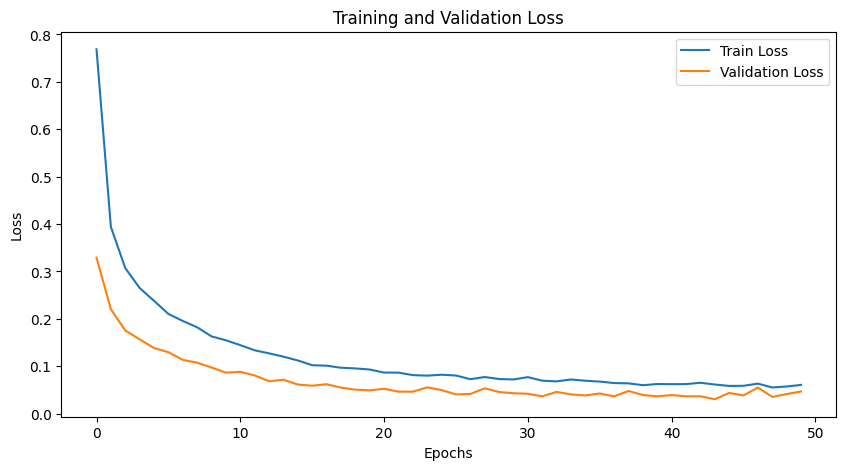

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


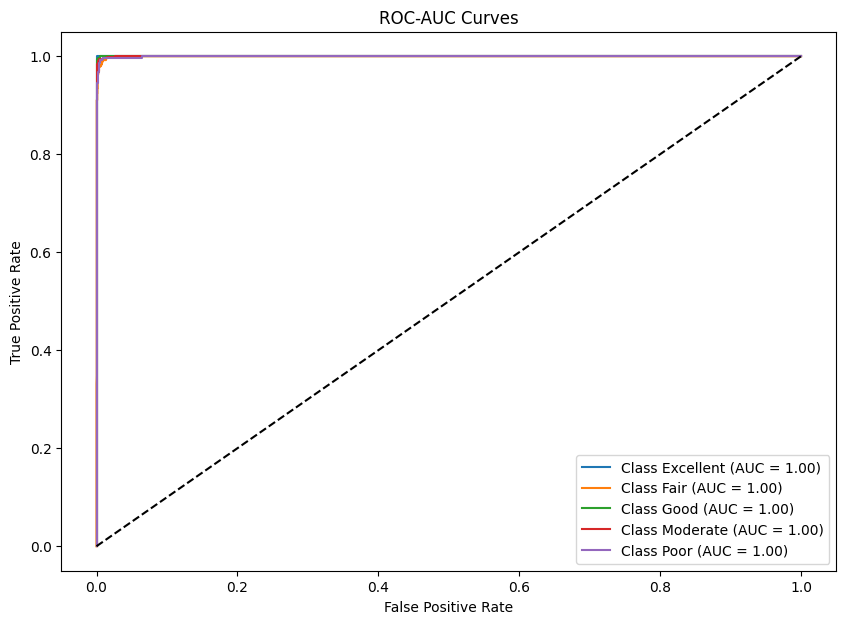

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Get model predictions
y_pred_prob = mlp_model.predict(X_test_scaled)

# Plot ROC curves for each class
plt.figure(figsize=(10, 7))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend()
plt.show()


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


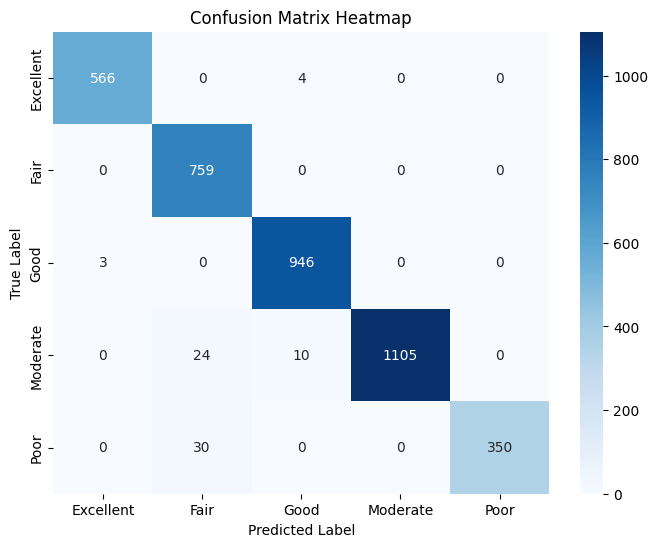

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
y_pred = mlp_model.predict(X_test_scaled).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:
mlp_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,849 (34.57 KB)

 Trainable params: 2,949 (11.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,900 (23.05 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

def compute_approx_flops(model):
    """Compute approximate FLOPs for a Keras model."""
    total_params = model.count_params()  # Total number of trainable parameters
    return total_params * 2  # Each parameter is used in a multiplication and addition

# Compute FLOPs for your MLP model
flops_mlp = compute_approx_flops(mlp_model)
print(f"Approximate FLOPs: {flops_mlp:,}")


Approximate FLOPs: 5,898


In [5]:
print(df["Soil_Quality"].value_counts())


Soil_Quality
Moderate     5695
Good         4746
Fair         3796
Excellent    2848
Poor         1899
Name: count, dtype: int64


In [6]:
print(label_encoder.classes_)


['Excellent' 'Fair' 'Good' 'Moderate' 'Poor']


In [5]:
import joblib

# Save the fitted scaler
joblib.dump(scaler, "soil_scaler.pkl")

['soil_scaler.pkl']

In [13]:
input_data = scaler.transform([[4.2, 4.9, 8.7, 12.1, 3.0, 10.0, 1.1, 101.9, 1.17, 2.547]])
prediction = mlp_model.predict(input_data)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.0000000e+00 1.4485434e-02 3.3580703e-34 9.3965220e-33 9.8551452e-01]]


c:\Users\Tishya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
import numpy as np

test_samples = [
    [5.8, 6.5, 20.3, 25.7, 45.0, 30.5, 2.5, 250.3, 1.5, 3.0],  # Expected: Good
    [6.9, 7.4, 15.2, 18.9, 5.0, 20.0, 2.0, 180.4, 0.9, 2.1],  # Expected: Excellent
    [4.2, 4.9, 8.7, 12.1, 3.0, 10.0, 1.1, 101.9, 1.17, 2.547]  # Expected: Poor
]

for i, sample in enumerate(test_samples):
    scaled_sample = scaler.transform([sample])  
    prediction = mlp_model.predict(scaled_sample)  
    predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])  
    print(f"Sample {i+1} | Expected: {['Good', 'Excellent', 'Poor'][i]} | Predicted: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Sample 1 | Expected: Good | Predicted: Moderate
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Sample 2 | Expected: Excellent | Predicted: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

c:\Users\Tishya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Tishya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Tishya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Sample 3 | Expected: Poor | Predicted: Poor
